In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn
import math
from sklearn.preprocessing import MinMaxScaler
import pandas_datareader as web

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.core import Dropout

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-data/AAPL.csv


### Load Data

In [2]:
# Stock price of Apple from 2010/1/4 to 2021-02-26
df = pd.read_csv('../AAPL.csv')
df['Date'] = df['Date'].astype('datetime64[ns]')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.583586,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.594968,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.490066,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.478067,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.521136,447610800
...,...,...,...,...,...,...,...
2836,2021-04-12,132.520004,132.850006,130.630005,131.240005,131.240005,91420000
2837,2021-04-13,132.440002,134.660004,131.929993,134.429993,134.429993,91266500
2838,2021-04-14,134.940002,135.000000,131.660004,132.029999,132.029999,87222800
2839,2021-04-15,133.820007,135.000000,133.639999,134.500000,134.500000,89347100


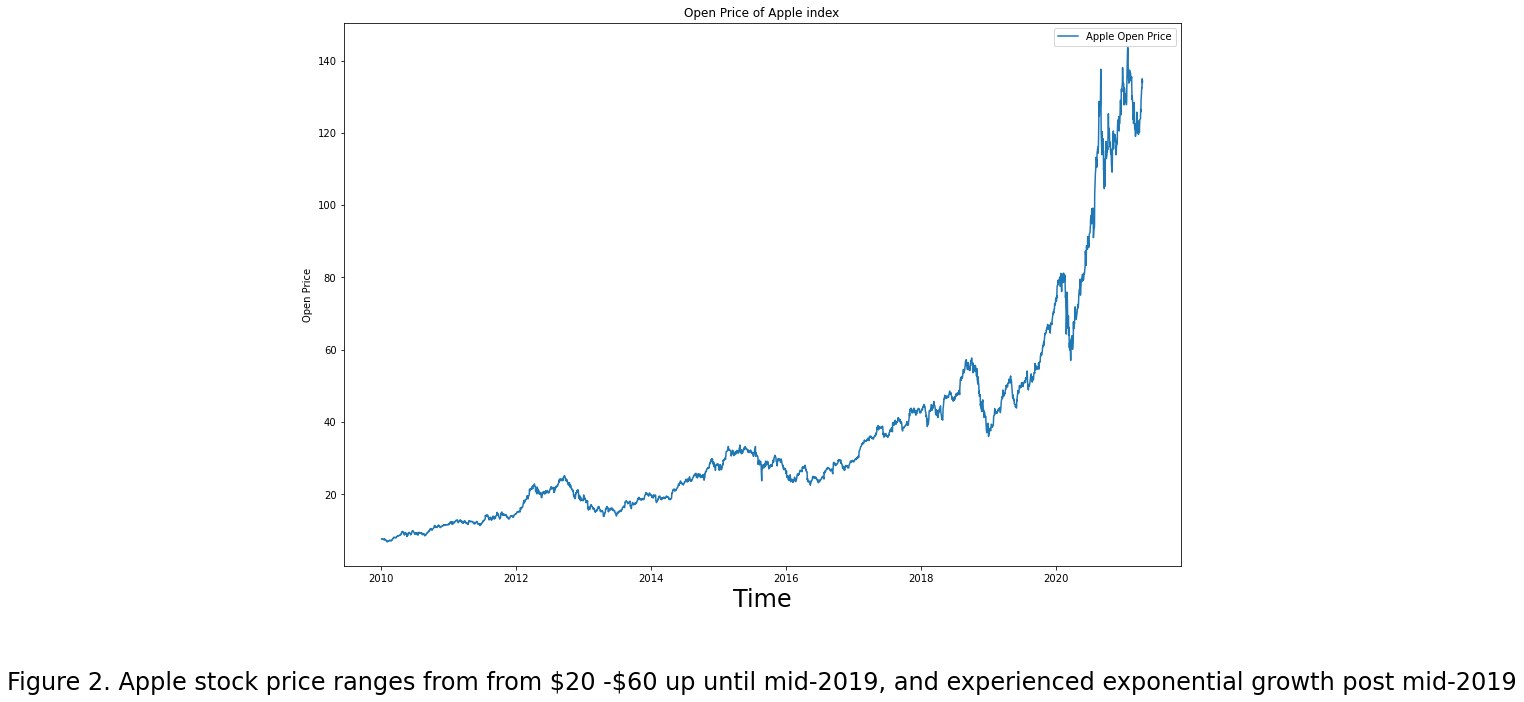

In [6]:
plt.figure(figsize=(15,10))
plt.plot(df['Date'], df['Open'], label='Apple Open Price')
plt.xlabel('''Time\n\n 
Figure 2. Apple stock price ranges from from \$20 -\$60 up until mid-2019, and experienced exponential growth post mid-2019''', fontsize=24)
plt.ylabel('Open Price')
plt.title('Open Price of Apple index')
plt.legend()
plt.show()

In [3]:
# Create a new dataframe with only the 'Open column 
data = df.filter(['Open'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .9384 ))

training_data_len

2666

In [4]:
df.loc[training_data_len]

Date         2020-08-06 00:00:00
Open                  110.404999
High                  114.412498
Low                   109.797501
Close                 113.902496
Adj Close             113.332329
Volume                 202428800
Name: 2666, dtype: object

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00550095],
       [0.00580656],
       [0.0057491 ],
       ...,
       [0.93666331],
       [0.928472  ],
       [0.93198254]])

In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([5.50095027e-03, 5.80656065e-03, 5.74909689e-03, 5.06212811e-03,
       4.68338071e-03, 5.33639196e-03, 4.39344359e-03, 4.04866102e-03,
       4.63375723e-03, 4.84793902e-03, 4.16881053e-03, 5.88753066e-03,
       5.14832741e-03, 3.76394589e-03, 2.64860623e-03, 3.54714580e-03,
       3.78223014e-03, 3.28072224e-03, 2.27508812e-03, 0.00000000e+00,
       9.24664116e-04, 7.31370268e-04, 1.13884590e-03, 6.79150431e-05,
       8.67200354e-04, 1.05787590e-03, 9.19434818e-04, 6.55622249e-04,
       1.49930905e-03, 2.49972118e-03, 3.08742839e-03, 2.41874387e-03,
       2.47882593e-03, 2.60420474e-03, 1.99298398e-03, 1.53065558e-03,
       1.30863351e-03, 2.61464871e-03, 3.49490402e-03, 4.58673744e-03,
       4.32814685e-03, 4.41695714e-03, 5.89537094e-03, 7.21967040e-03,
       6.77562626e-03, 8.21747154e-03, 8.23836679e-03, 9.14212835e-03,
       8.62233618e-03, 8.30889283e-03, 8.49695738e-03, 8.28799027e-03,
       8.46822184e-03, 7.33982722e-03, 8.69024391e-03, 9.21265438e-03,
     

In [9]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
2606/2606 [==============================] - 68s 25ms/step - loss: 0.0012
Epoch 2/3
2606/2606 [==============================] - 67s 26ms/step - loss: 2.0917e-04
Epoch 3/3
2606/2606 [==============================] - 70s 27ms/step - loss: 2.0597e-04


In [10]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('Test RMSE:', rmse)

Test RMSE: 4.2137416861818044


In [11]:
# TEST RMSE (Without Dropout): Test RMSE: 5.409406286222094
# TEST RMSE (With Dropout): Test RMSE: 3.5383520443855514
# Optimized TEST RMSE: 4.905389868810613

In [12]:
print(predictions[0:5])
df[training_data_len+1:training_data_len+5]

[[110.62214]
 [111.17352]
 [113.11493]
 [113.70446]
 [113.45788]]


,Date,Open,High,Low,Close,Adj Close,Volume
2667,2020-08-07,113.205002,113.675003,110.292503,111.112503,110.755638,198045600
2668,2020-08-10,112.599998,113.775002,110.000000,112.727501,112.365448,212403600
2669,2020-08-11,111.970001,112.482498,109.107498,109.375000,109.023705,187902400
2670,2020-08-12,110.497498,113.275002,110.297501,113.010002,112.647041,165944800


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


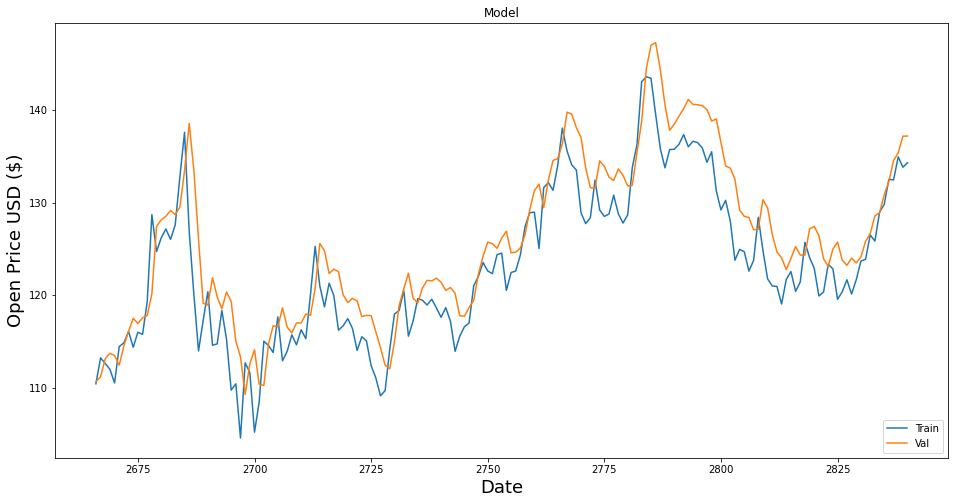

In [13]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
#plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### Agent

In [17]:
# Determine when to excecute the strategies
class LSTM_Agent:
    
    def __init__(self, wallet):
        self.data = None
        self.wallet = wallet # Amount of cash in hand
        self.portfolio = 0 # Company stock count
        self.current_market = None
        self.input = None # Prediction input
        self.scaler = MinMaxScaler(feature_range=(0,1))
        self.history = [[[],[]],[[],[]]] # 1st arr: Buy history; 2nd arr: sell history. [date, price]
        self.all_hist = [[],[]] # date prediction
        self.percent_gains = []
    
    # Check if the agent can buy the stock
    # Returns: Boolean. True if can buy, False if not
    def can_buy(self, unit):
        if unit == -1:
            if self.wallet >= self.current_market['Open']:
                return True
        else:
            if self.wallet >= unit*self.current_market['Open']:
                return True
        return False
    
    # Check if the agent can sell the stock
    # Returns: Boolean. True if can sell, False if not
    def can_sell(self, unit):
        if unit == -1:
            if self.portfolio > 0:
                return True
        else:
            if self.portfolio >= unit:
                return True
        return False
    
    # Buys x unit of stock. -1 to spend all
    def buy(self, unit):
        current_price = self.current_market['Open'] # price 1 stock
        # Update fields
        if unit == -1:
            unit = math.floor(self.wallet/current_price)
        self.wallet -= unit*current_price
        self.portfolio += unit
        self.history[0][0].append(self.current_market['Date'])
        self.history[0][1].append(current_price)
    
    # Sells x unit of stock. -1 to sell all
    def sell(self, unit):
        current_price = self.current_market['Open'] # price 1 stock
        # Update fields
        if unit == -1:
            unit = self.portfolio
        self.wallet += unit*current_price
        self.portfolio -= unit
        self.history[1][0].append(self.current_market['Date'])
        self.history[1][1].append(current_price)
    
    # Computes the total balance: wallet + holdings
    def total_balance(self):
        current_price = self.current_market['Open'] # price 1 stock
        return self.wallet + current_price*self.portfolio
    
    def shape_input(self, idx):
        #print('In Shape Input')
        temp = [np.array(self.data['Scaled_Open'].iloc[idx-60:idx])]
        self.input = np.reshape(temp, (1, 60, 1 ))
        #print(self.input)
        
    
    # Defines the buying/selling strategy
    # Buy when sma20 goes above sma50
    # Sell when sma20 goes below sma50
    def strategy(self):
        pred = model.predict(self.input)
        pred = self.scaler.inverse_transform(pred)[0][0]
        #print('pred', pred)
        self.all_hist[0].append(self.current_market['Date'])
        self.all_hist[1].append(pred)
        current_price = self.current_market['Open']
        #print('current_price', current_price)
        #print('Predict:', pred, 'Current:', current_price)
        percent_gain = 100*(pred-current_price)/current_price
        self.percent_gains.append(percent_gain)
        if percent_gain > 2 and self.can_buy(-1):
            # Buy signal
            #print('BUY! ','Predict:', pred, 'Current:', current_price)
            self.buy(-1)
        elif percent_gain < -2 and self.can_sell(-1):
            # sell signal
            #print('SELL! ','Predict:', pred, 'Current:', current_price)
            self.sell(-1)
    
    # Given a dataframe computes the buy and sell signals
    def deploy(self, data):
        scaled_data = self.scaler.fit_transform(data[['Open']].values)
        data['Scaled_Open'] = scaled_data
        self.data = data.reset_index()
        print(self.data.head())
        for (idx, row) in self.data.iterrows():
            self.current_market = data.iloc[idx]
            
            if idx > 59: # first day where model can make prediction
                self.shape_input(idx)
                self.strategy()
        
                #break
        return self.history

In [18]:
timeline1 = df[(df['Date'] >= '2011-10-14') & (df['Date'] <= '2013-08-01')]
timeline2 = df[(df['Date'] >= '2020-08-07') & (df['Date'] <= '2021-02-26')]
timeline_main = df[(df['Date'] >= '2020-08-07') & (df['Date'] <= '2021-04-16')]

In [19]:
# Subtracting 60 days from the intended test timeline as the model 
# requires 60 days worth of prior data to make predictions. 
timeline1 = df[390:901]
timeline2 = df[2607:2807]
timeline_main = df[2607:2841]

# Timeline Main

In [20]:
# Inputs
invest = 1000
agent = LSTM_Agent(invest)
buy_info, sell_info = agent.deploy(timeline_main)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


   index       Date       Open       High        Low      Close  Adj Close  \
0   2607 2020-05-13  78.037498  78.987503  75.802498  76.912498  76.527496   
1   2608 2020-05-14  76.127502  77.447502  75.382500  77.385002  76.997635   
2   2609 2020-05-15  75.087502  76.974998  75.052498  76.927498  76.542412   
3   2610 2020-05-18  78.292503  79.125000  77.580002  78.739998  78.345848   
4   2611 2020-05-19  78.757500  79.629997  78.252502  78.285004  77.893127   

      Volume  Scaled_Open  
0  200622400     0.043058  
1  158929200     0.015180  
2  166348400     0.000000  
3  135372400     0.046780  
4  101729600     0.053567  


In [21]:
# Check performance
print('Invested:', invest)
print('End of day total balance:', agent.total_balance())
print('Percentage gain:', 100*(agent.total_balance()-invest)/invest, '%')

print()
#print('Baseline:', 100*(timeline_main.iloc[-1].Open-timeline_main.iloc[0].Open)/timeline_main.iloc[0].Open, '%')

Invested: 1000
End of day total balance: 1327.3499660000002
Percentage gain: 32.734996600000024 %



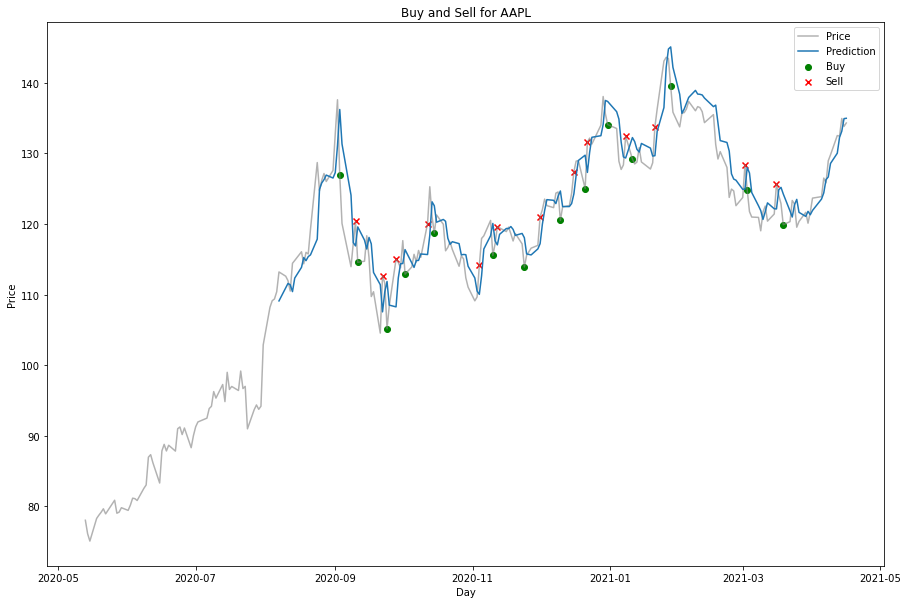

In [22]:
# Visualize SMAs and prices
plt.figure(figsize=(15,10))
plt.plot(timeline_main[['Date']], timeline_main[['Open']], label='Price', c='grey', alpha=0.6)
plt.scatter(buy_info[0], buy_info[1], marker='o', label='Buy', c='green')
plt.scatter(sell_info[0], sell_info[1], marker='x', label='Sell', c='red')

plt.plot(agent.all_hist[0], agent.all_hist[1], label='Prediction')

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Buy and Sell for AAPL')
plt.legend()
plt.show()

# Timeline 2

In [23]:
# Inputs
invest = 1000
agent = LSTM_Agent(invest)
buy_info, sell_info = agent.deploy(timeline2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


   index       Date       Open       High        Low      Close  Adj Close  \
0   2607 2020-05-13  78.037498  78.987503  75.802498  76.912498  76.527496   
1   2608 2020-05-14  76.127502  77.447502  75.382500  77.385002  76.997635   
2   2609 2020-05-15  75.087502  76.974998  75.052498  76.927498  76.542412   
3   2610 2020-05-18  78.292503  79.125000  77.580002  78.739998  78.345848   
4   2611 2020-05-19  78.757500  79.629997  78.252502  78.285004  77.893127   

      Volume  Scaled_Open  
0  200622400     0.043058  
1  158929200     0.015180  
2  166348400     0.000000  
3  135372400     0.046780  
4  101729600     0.053567  


In [24]:
# Check performance
print('Invested:', invest)
print('End of day total balance:', agent.total_balance())
print('Percentage gain:', 100*(agent.total_balance()-invest)/invest, '%')

print()
#print('Baseline:', 100*(timeline2.iloc[-1].Open-timeline2.iloc[0].Open)/timeline2.iloc[0].Open, '%')

Invested: 1000
End of day total balance: 1137.3598940000004
Percentage gain: 13.735989400000038 %



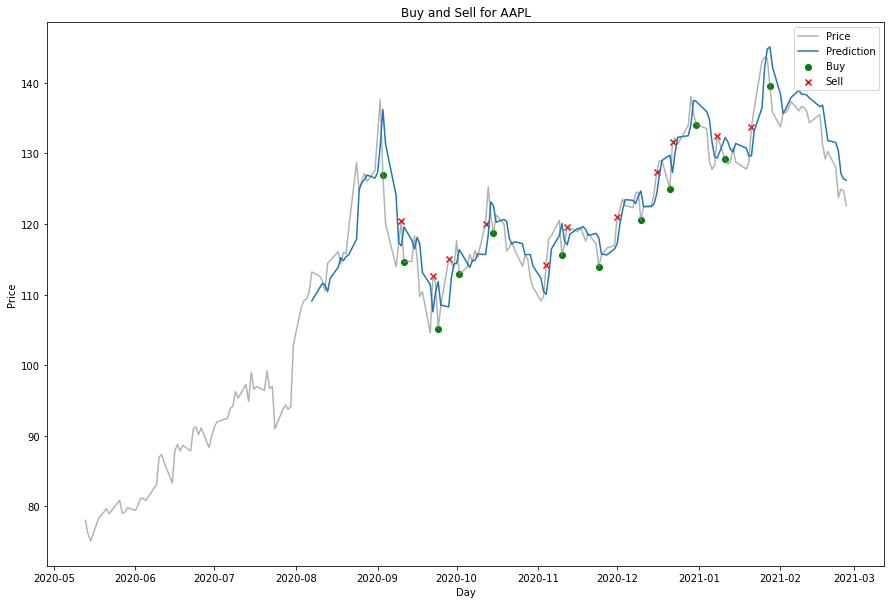

In [25]:
# Visualize SMAs and prices
plt.figure(figsize=(15,10))
plt.plot(timeline2[['Date']], timeline2[['Open']], label='Price', c='grey', alpha=0.6)
plt.scatter(buy_info[0], buy_info[1], marker='o', label='Buy', c='green')
plt.scatter(sell_info[0], sell_info[1], marker='x', label='Sell', c='red')

plt.plot(agent.all_hist[0], agent.all_hist[1], label='Prediction')

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Buy and Sell for AAPL')
plt.legend()
plt.show()

# Timeline 1

In [26]:
# Inputs
invest = 1000
agent = LSTM_Agent(invest)
buy_info, sell_info = agent.deploy(timeline1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


   index       Date       Open       High        Low      Close  Adj Close  \
0    390 2011-07-21  13.819643  13.930714  13.710714  13.831786  11.914196   
1    391 2011-07-22  13.868571  14.108929  13.848214  14.046429  12.099082   
2    392 2011-07-25  13.941071  14.285714  13.915000  14.232143  12.259048   
3    393 2011-07-26  14.285714  14.446429  14.274286  14.407500  12.410095   
4    394 2011-07-27  14.306786  14.380000  14.005357  14.021071  12.077242   

      Volume  Scaled_Open  
0  526534400     0.077899  
1  516728800     0.081903  
2  589806000     0.087837  
3  476582400     0.116045  
4  659324400     0.117769  


In [27]:
# Check performance
print('Invested:', invest)
print('End of day total balance:', agent.total_balance())
print('Percentage gain:', 100*(agent.total_balance()-invest)/invest, '%')

print()
#print('Baseline:', 100*(timeline2.iloc[-1].Open-timeline2.iloc[0].Open)/timeline2.iloc[0].Open, '%')

Invested: 1000
End of day total balance: 1087.2246360000008
Percentage gain: 8.722463600000083 %



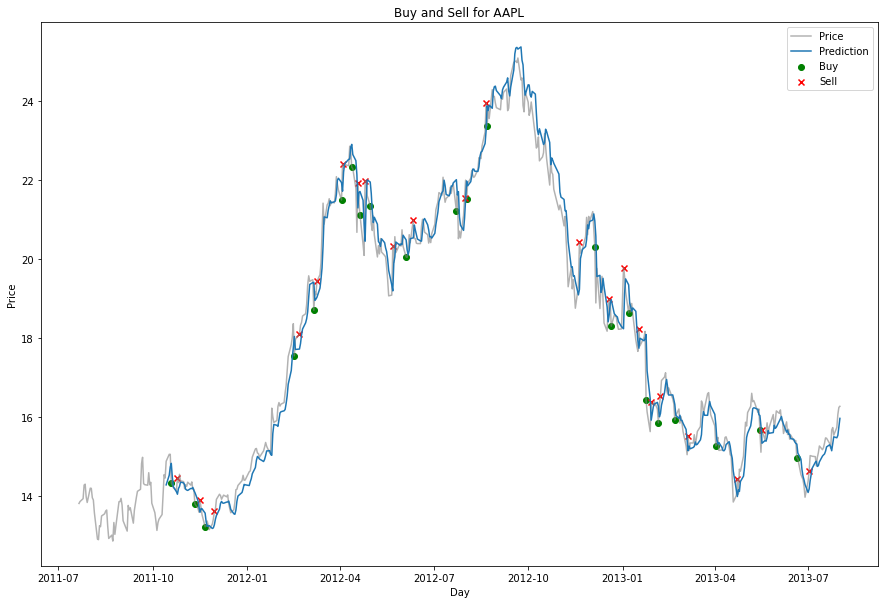

In [28]:
# Visualize SMAs and prices
plt.figure(figsize=(15,10))
plt.plot(timeline1[['Date']], timeline1[['Open']], label='Price', c='grey', alpha=0.6)
plt.scatter(buy_info[0], buy_info[1], marker='o', label='Buy', c='green')
plt.scatter(sell_info[0], sell_info[1], marker='x', label='Sell', c='red')

plt.plot(agent.all_hist[0], agent.all_hist[1], label='Prediction')

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Buy and Sell for AAPL')
plt.legend()
plt.show()